In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_excel('Chapter5_Fracability_DataSet.xlsx')

In [3]:
df.head()

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,1
1,9370.348405,577.253950,15.403192,324.750529,0.497242,0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,1
4,18861.977710,614.959877,18.048478,480.189015,1.171049,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MD_ft,1000.0,14000.000000,4269.740397,2571.139190,10943.676726,13864.280896,17149.039581,25382.097071
Resistivity,1000.0,500.000000,179.604705,-2.624400,364.746085,497.077253,620.324542,970.103975
YM/PR,1000.0,24.000000,8.388762,4.917917,17.708133,23.399724,29.588017,49.567271
GR,1000.0,300.000000,122.443017,-2.296323,210.515488,302.737171,387.137024,627.305824
Minimum Horizontal Stress Gradient,1000.0,0.926601,0.234990,0.292125,0.747472,0.932445,1.106538,1.508552
Fracability,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [5]:
df.columns

Index(['MD_ft', 'Resistivity', 'YM/PR', 'GR',
       'Minimum Horizontal Stress Gradient', 'Fracability'],
      dtype='object')

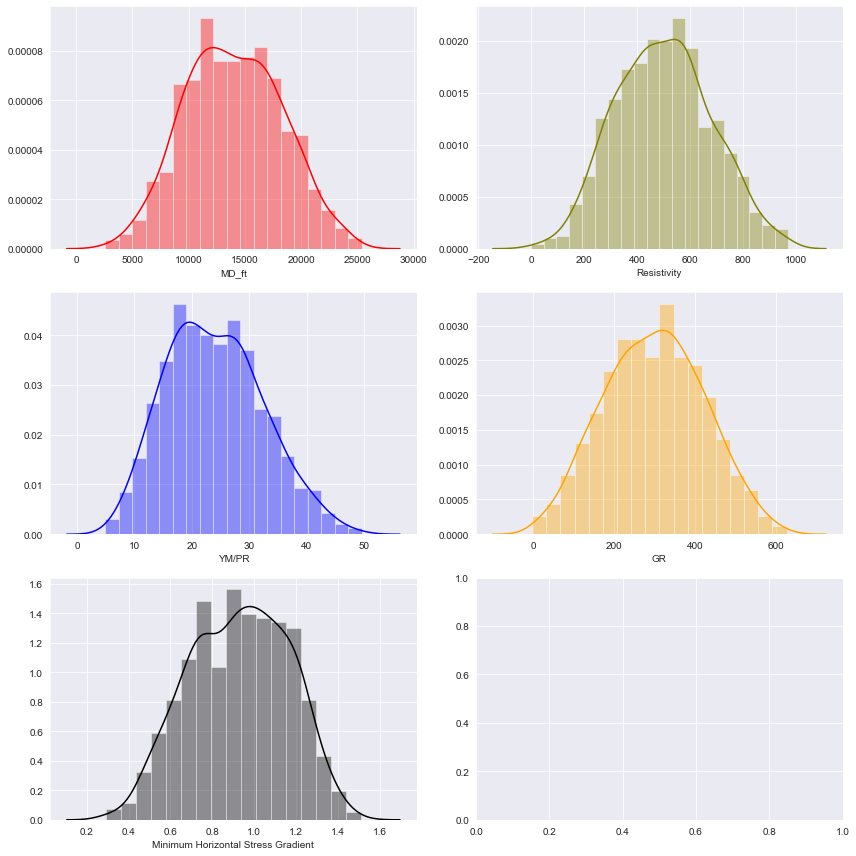

In [6]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.distplot(df['MD_ft'] , color="red", ax=axes[0, 0])
sns.distplot(df['Resistivity'] , color="olive", ax=axes[0, 1])
sns.distplot(df['YM/PR'] , color="blue", ax=axes[1, 0])
sns.distplot(df['GR'] , color="orange", ax=axes[1, 1])
sns.distplot(df['Minimum Horizontal Stress Gradient'] , color="black", ax=axes[2, 0])

plt.tight_layout()

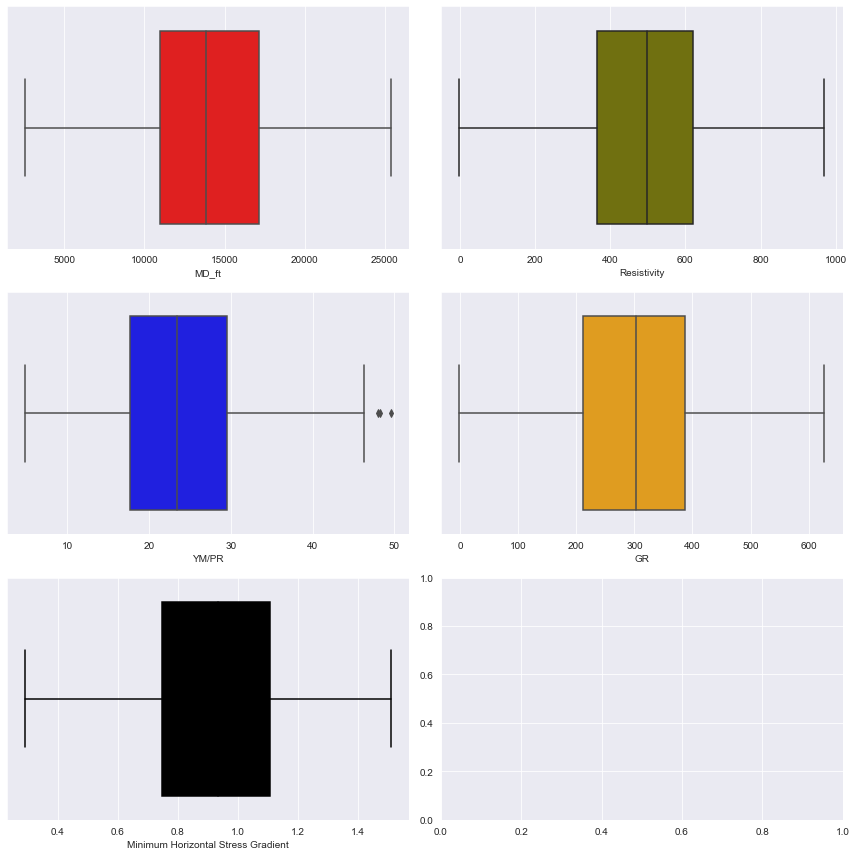

In [7]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.boxplot(df['MD_ft'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Resistivity'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['YM/PR'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['GR'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['Minimum Horizontal Stress Gradient'] , color="black", ax=axes[2, 0])

plt.tight_layout()

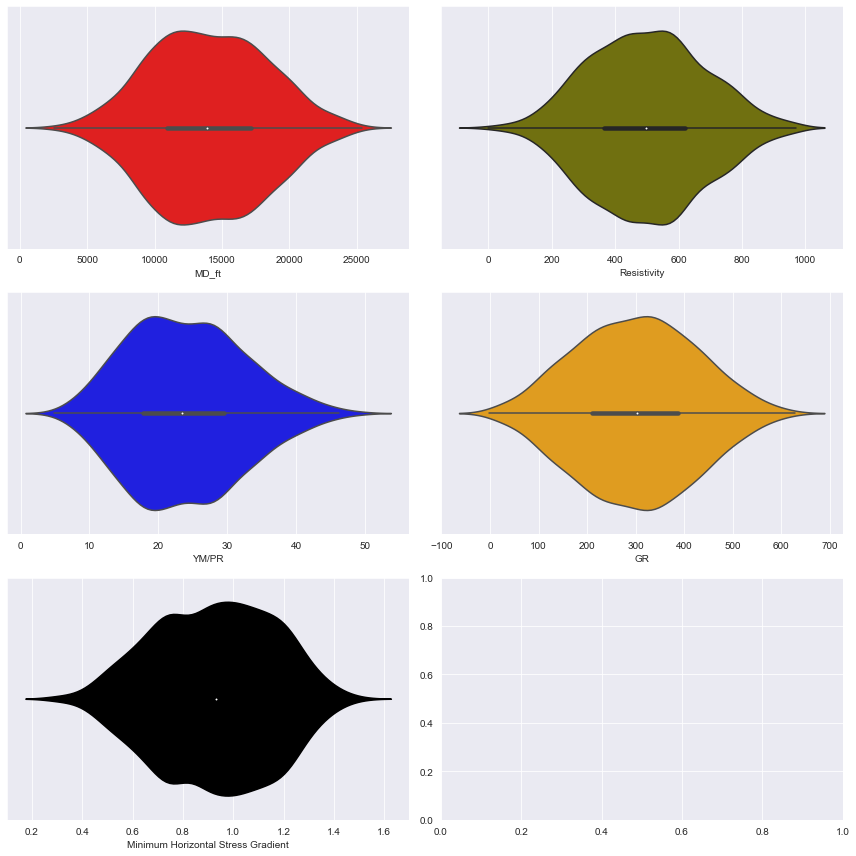

In [8]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.violinplot(df['MD_ft'] , color="red", ax=axes[0, 0])
sns.violinplot(df['Resistivity'] , color="olive", ax=axes[0, 1])
sns.violinplot(df['YM/PR'] , color="blue", ax=axes[1, 0])
sns.violinplot(df['GR'] , color="orange", ax=axes[1, 1])
sns.violinplot(df['Minimum Horizontal Stress Gradient'] , color="black", ax=axes[2, 0])

plt.tight_layout()

Text(0.5, 0, 'Count')

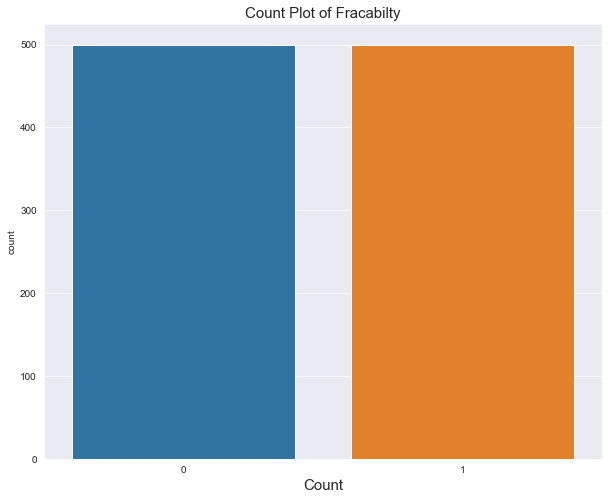

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(df['Fracability'])
plt.title('Count Plot of Fracabilty', fontsize=15)
plt.xlabel('Categories', fontsize=15)
plt.xlabel('Count', fontsize=15)

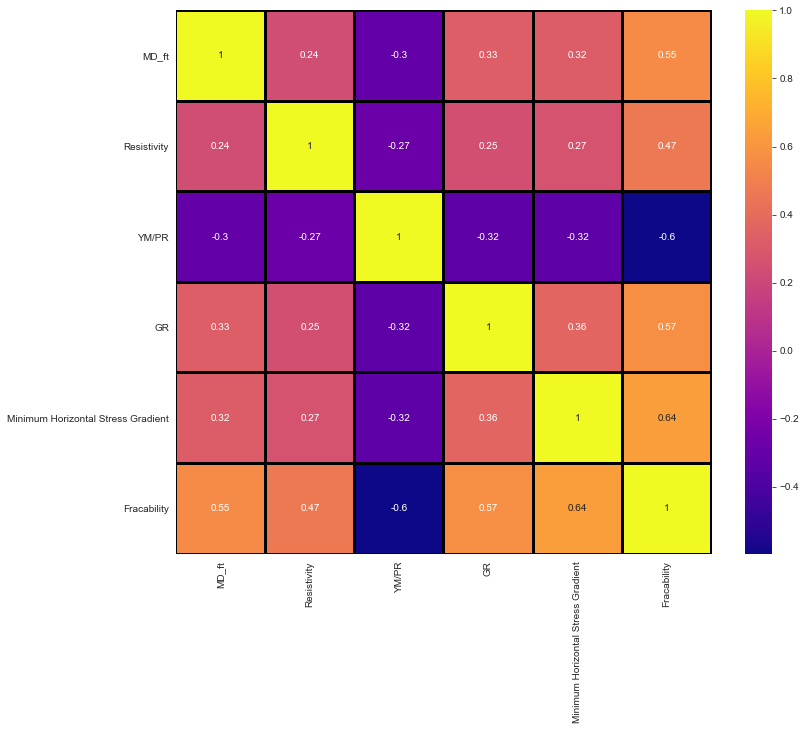

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='plasma', annot=True)

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y = df['Fracability']
x = df.drop(['Fracability'], axis=1)
x_scaled=scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

array([[0.4779121 , 0.48240727, 0.25584607, 0.76828069, 0.33821385],
       [0.29806768, 0.59613595, 0.23483597, 0.51945003, 0.16862214],
       [0.3534701 , 0.45409566, 0.48399637, 0.42460314, 0.38981083],
       ...,
       [0.62109238, 0.6114045 , 0.39372412, 0.93935925, 0.36436871],
       [0.58840762, 0.69808704, 0.15223219, 0.48728734, 0.59998625],
       [0.42850058, 0.62668706, 0.15857854, 0.59050528, 0.58665816]])

In [12]:
seed= 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size= 0.30)

# Support Vector Machine

In [13]:
from sklearn import svm

In [14]:
np.random.seed(seed)
svm = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=1, tol=0.001)

In [15]:
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Accuracy Score: 0.9366666666666666
Confusion Matrix:
[[138  14]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       152
           1       0.91      0.97      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



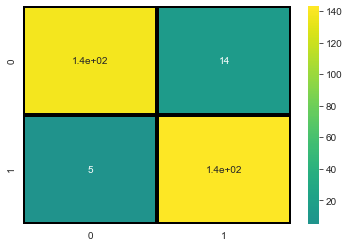

In [17]:
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='viridis', linewidths=3, linecolor='black')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
np.random.seed(seed)
scores = cross_val_score(svm, x_scaled, y,cv=10,scoring='accuracy')
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.94 0.93 0.93 0.93 0.9  0.95 0.92 0.95 0.97 0.97]
Average cross-validation score: 0.9390000000000003


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
np.random.seed(seed)
rf = RandomForestClassifier(n_estimators=5000, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5,
     max_features='auto')

In [21]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score: 0.9366666666666666
Confusion Matrix:
[[139  13]
 [  6 142]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       152
           1       0.92      0.96      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



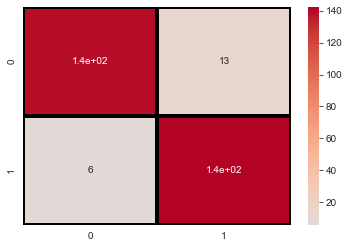

In [22]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

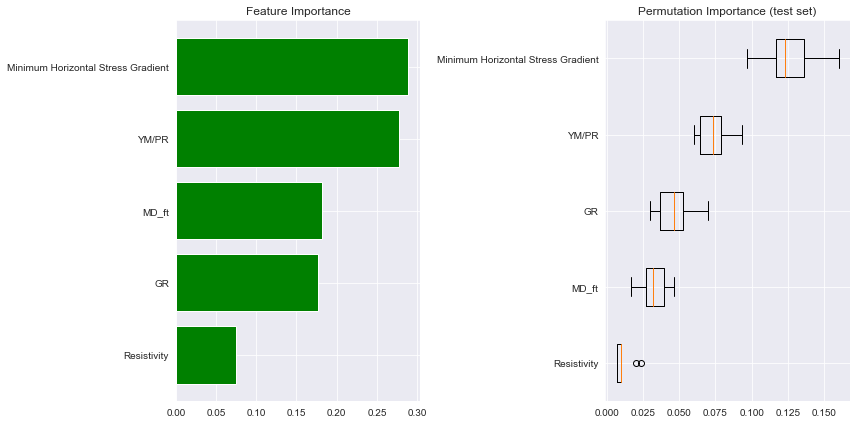

In [23]:
from sklearn.inspection import permutation_importance
feature_importance = rf.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='green')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(rf, x_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

In [24]:
np.random.seed(seed)
scores = cross_val_score(rf, x_scaled, y,cv=10,scoring='accuracy')
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.94 0.93 0.92 0.91 0.91 0.95 0.92 0.93 0.93 0.95]
Average cross-validation score: 0.9289999999999999


# Extra Trees

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
np.random.seed(seed)
et = ExtraTreesClassifier(n_estimators=5000, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5, \
    max_features='auto')

In [27]:
et.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Accuracy Score: 0.9333333333333333
Confusion Matrix:
[[137  15]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       152
           1       0.91      0.97      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



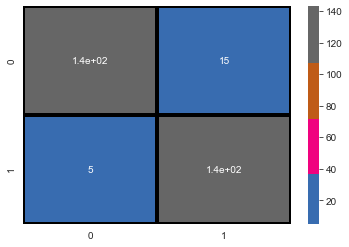

In [28]:
y_pred = et.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='Accent', linewidths=3, linecolor='black')
plt.show()

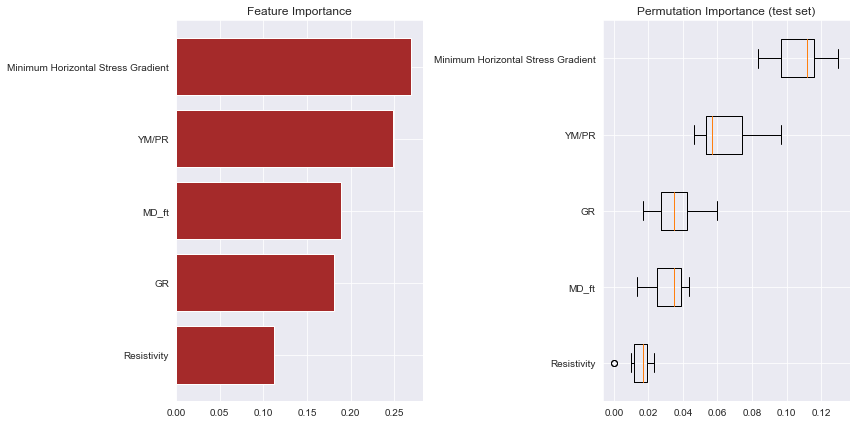

In [29]:
from sklearn.inspection import permutation_importance
feature_importance = et.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='brown')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(et, x_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

In [30]:
np.random.seed(seed)
scores = cross_val_score(et, x_scaled, y,cv=10,scoring='accuracy')
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.94 0.92 0.91 0.92 0.9  0.94 0.93 0.93 0.93 0.97]
Average cross-validation score: 0.929



# Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
np.random.seed(seed)
gb =GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=2000, criterion='friedman_mse',
                               min_samples_split=2, min_samples_leaf=1, max_depth=3,max_features=None)

In [33]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy Score: 0.9266666666666666
Confusion Matrix:
[[137  15]
 [  7 141]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       152
           1       0.90      0.95      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



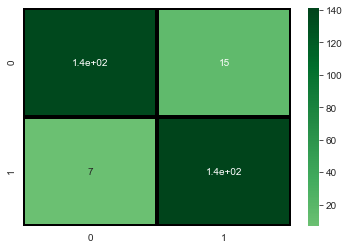

In [34]:
y_pred = gb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='Greens', linewidths=3, linecolor='black')
plt.show()

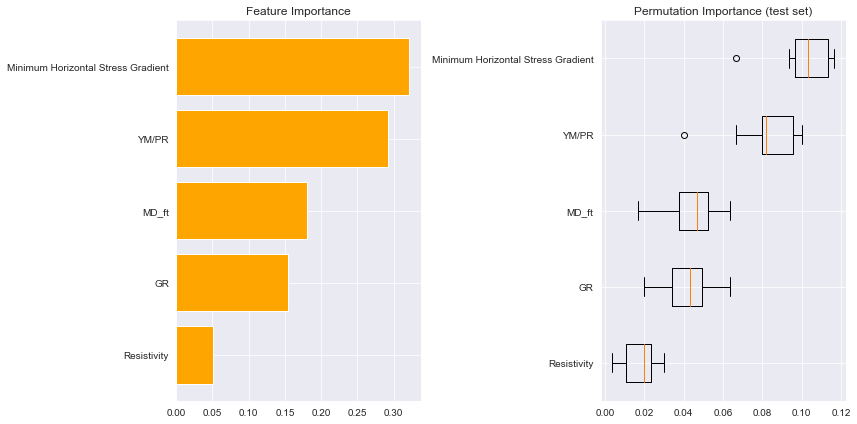

In [35]:
from sklearn.inspection import permutation_importance
feature_importance = gb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='orange')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(gb, x_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

In [36]:
np.random.seed(seed)
scores = cross_val_score(gb, x_scaled, y,cv=10,scoring='accuracy')
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.95 0.89 0.89 0.91 0.89 0.92 0.9  0.94 0.95 0.94]
Average cross-validation score: 0.9179999999999998


# Extra Gradient Boosting

In [37]:
from xgboost import XGBClassifier

In [38]:
np.random.seed(seed)
xgb = XGBClassifier(objective ='binary:logistic',n_estimators=5000, reg_lambda=1, gamma=0,max_depth=3,\
                 learning_rate = 0.1, alpha = 0.5)

In [39]:
xgb.fit(x_train, y_train)

XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy Score: 0.9266666666666666
Confusion Matrix:
[[135  17]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       152
           1       0.89      0.97      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



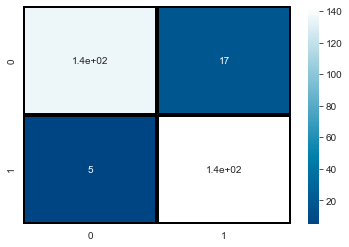

In [40]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='ocean', linewidths=3, linecolor='black')
plt.show()

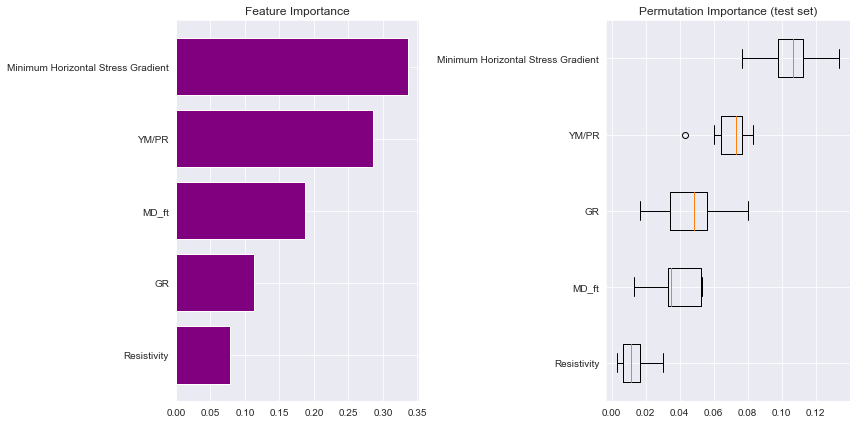

In [41]:
from sklearn.inspection import permutation_importance
feature_importance = xgb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='purple')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(xgb, x_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

In [42]:
np.random.seed(seed)
scores = cross_val_score(xgb, x_scaled, y,cv=10,scoring='accuracy')
print("Cross-validation scores: {}". format(scores))
print("Average cross-validation score: {}". format(scores.mean()))

Cross-validation scores: [0.93 0.92 0.91 0.92 0.89 0.91 0.92 0.93 0.97 0.94]
Average cross-validation score: 0.924
